In [ ]:
import pandas as pd

aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')
order_products_train = pd.read_csv('data/order_products__train.csv')
orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')


In [3]:
data_frames = [orders, products, order_products_prior, order_products_train, aisles, departments]

for df in data_frames:
  print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entrie

In [4]:
print(departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


#b. Data Cleaning:
#  - Handle missing values.

In [ ]:
def handle_missing_values(dataframes, column_to_fill=None, fill_value=0):
  for df in dataframes:
    df_name = getattr(df, 'name', 'Unnamed DataFrame')

    print(f"DataFrame: {df_name}")
    print(df.isnull().sum())

    if column_to_fill:
      df[column_to_fill].fillna(fill_value, inplace=True)
      print(f"Filled missing values in '{column_to_fill}' with {fill_value}.")

dataframes = [aisles, orders, products, order_products_prior, order_products_train, departments]
handle_missing_values(dataframes, column_to_fill=0)

DataFrame: Unnamed DataFrame
aisle_id    0
aisle       0
dtype: int64
DataFrame: Unnamed DataFrame
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
DataFrame: Unnamed DataFrame
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
DataFrame: Unnamed DataFrame
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
DataFrame: Unnamed DataFrame
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
DataFrame: Unnamed DataFrame
department_id    0
department       0
dtype: int64


In [6]:
print(departments.isnull().sum())

department_id    0
department       0
dtype: int64


#b. Data Cleaning:
# - Convert data types .

In [7]:
orders['order_dow'] = orders['order_dow'].astype('category')

In [8]:
orders['order_hour_of_day'] = orders['order_hour_of_day'].astype('category')

In [9]:
orders['days_since_prior_order'] = pd.to_numeric(orders['days_since_prior_order'])

#b. Data Cleaning: 
# Merge DataFrames as needed . 

In [10]:
#merged_order_products = pd.merge(order_products_prior, order_products_train)


In [11]:
order_products = order_products_prior.merge(products, on='product_id', how='left')

order_products.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [12]:
orders_prior_merged = pd.merge(order_products_prior, orders, on='order_id', how='left')
orders_prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [13]:
products_merged = pd.merge(order_products, aisles, on='aisle_id', how='left')
products_merged = pd.merge(products_merged, departments, on='department_id', how='left')

products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


#Basic Descriptive Statistics:
#  Calculate summary statistics for numerical features.

In [14]:
orders.describe()

,order_id,user_id,order_number,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,3.000000e+01


In [15]:
products.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [16]:
order_products_prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [17]:
order_products_train.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


In [18]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [19]:
departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


#c. Basic Descriptive Statistics:
# - Examine the distribution of categorical features.

In [20]:
orders['order_dow'].value_counts()

order_dow
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: count, dtype: int64

In [21]:
orders['order_hour_of_day'].value_counts()

order_hour_of_day
10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: count, dtype: int64

In [22]:
products['aisle_id'].value_counts()

aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: count, Length: 134, dtype: int64

In [23]:
products['department_id'].value_counts()

department_id
11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1115
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64

#2. Exploratory Data Analysis (EDA) 
#a. Customer Behavior: 
# - Average number of orders per user. 

In [24]:
avg_orders_per_user = orders.groupby('user_id').size().mean()
print(f"Average number of orders per user: {avg_orders_per_user:.2f}")

Average number of orders per user: 16.59


#2. Exploratory Data Analysis (EDA) 
#a. Customer Behavior:
#  -  Average time between orders for each user

In [ ]:

average_time_between_orders = orders.groupby('user_id')['days_since_prior_order'].mean()
pd.DataFrame(average_time_between_orders.head())


,days_since_prior_order
user_id,
1,19.000000
2,16.285714
3,12.000000
4,17.000000
5,11.500000


#2. Exploratory Data Analysis (EDA) 

#a. Customer Behavior: 
# - Number of orders placed by each customer. 

In [26]:
orders_per_customer = orders['user_id'].value_counts()
pd.DataFrame(orders_per_customer.head())


,count
user_id,
152340,100
185641,100
185524,100
81678,100
70922,100


#2. Exploratory Data Analysis (EDA) 

#a. Customer Behavior: 
# - Customer segments based on purchase frequency.  

In [27]:
orders_per_customer_binned = pd.cut(orders_per_customer, bins=3, labels=['low', 'med', 'high'])
pd.DataFrame(orders_per_customer_binned)


,count
user_id,
152340,high
185641,high
185524,high
81678,high
70922,high
...,...
13046,low
70208,low
111440,low



#2. Exploratory Data Analysis (EDA) 
#b. Product Analysis: 
# - Identify most popular products by frequency.


In [28]:
#total_product_counts= order_products[["product_id","product_name"]].value_counts().sort_values(ascending=False).head(10)
#pd.DataFrame(total_product_counts)

,,count
product_id,product_name,
24852,Banana,472565
13176,Bag of Organic Bananas,379450
21137,Organic Strawberries,264683
21903,Organic Baby Spinach,241921
47209,Organic Hass Avocado,213584
47766,Organic Avocado,176815
47626,Large Lemon,152657
16797,Strawberries,142951
26209,Limes,140627


In [84]:
total_product_counts = order_products.groupby(['product_name',"product_id"])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False).head(10)
total_product_counts.columns = [ 'product_name',"product_id",'order_count']
total_product_counts


,product_name,product_id,order_count
3676,Banana,24852,472565
3471,Bag of Organic Bananas,13176,379450
31920,Organic Strawberries,21137,264683
28840,Organic Baby Spinach,21903,241921
30297,Organic Hass Avocado,47209,213584
28804,Organic Avocado,47766,176815
22413,Large Lemon,47626,152657
42904,Strawberries,16797,142951
23420,Limes,26209,140627
32478,Organic Whole Milk,27845,137905


#2. Exploratory Data Analysis (EDA) 
#b. Product Analysis: 
# - Determine average order size (number of items per order).

In [29]:
# Calculate the average order size
order_size = order_products_prior.groupby('order_id').size().mean()

print(f"\nAverage order size (number of items per order): {order_size}")



Average order size (number of items per order): 10.088883421247614


#2. Exploratory Data Analysis (EDA) 
#c. Temporal Patterns: 
# - Analyze orders by day of the week and hour of the day. 

d:\Users\lenovo\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


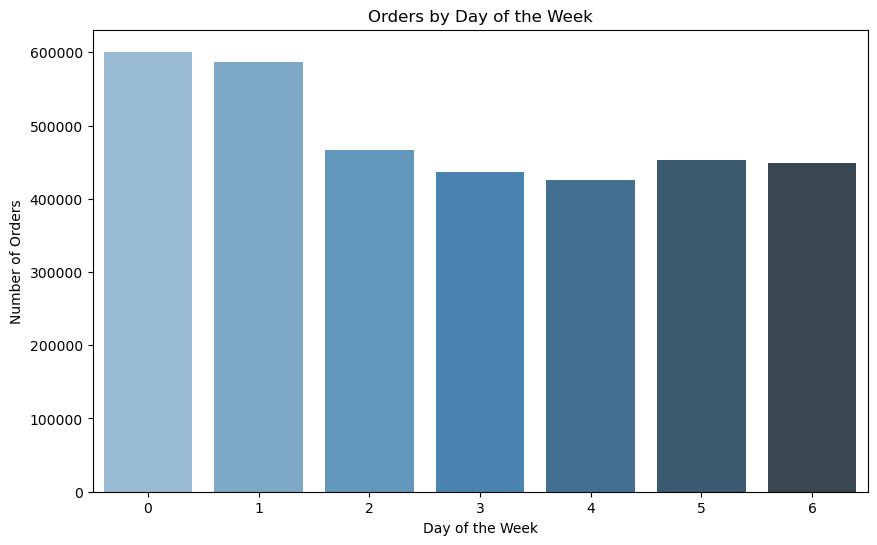

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count orders by day of the week
orders_by_day = orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='Blues_d')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


d:\Users\lenovo\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


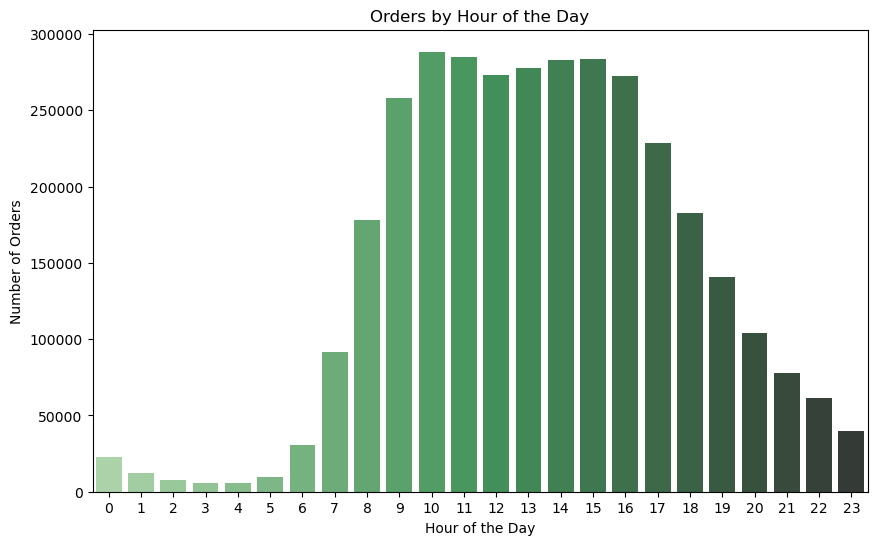

In [31]:
# Count orders by hour of the day
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette='Greens_d')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()


#d. Basket Analysis: 
# - Identify most frequently co-purchased items.

In [34]:
head_order_products=order_products.head(7000)

In [35]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# Create list of transactions
transactions = head_order_products.groupby('order_id')['product_name'].apply(list).tolist()

# Apply TransactionEncoder to transform data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


In [36]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)
frequent_itemsets.head(1000)

,support,itemsets
7,0.152958,(Banana)
6,0.122655,(Bag of Organic Bananas)
45,0.075036,(Organic Baby Spinach)
86,0.073593,(Organic Strawberries)
65,0.069264,(Organic Hass Avocado)
...,...,...
125,0.010101,(Whole Milk)
127,0.010101,"(Asparagus, Organic Baby Spinach)"
128,0.010101,"(Bag of Organic Bananas, Organic Baby Carrots)"
129,0.010101,"(Organic Baby Spinach, Bag of Organic Bananas)"


In [37]:

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Baby Spinach),(Banana),0.075036,0.152958,0.025974,0.346154,2.263062,0.014497,1.295476,0.603397
1,(Banana),(Organic Baby Spinach),0.152958,0.075036,0.025974,0.169811,2.263062,0.014497,1.114161,0.658906
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.122655,0.069264,0.020202,0.164706,2.377941,0.011706,1.114261,0.660479
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.069264,0.122655,0.020202,0.291667,2.377941,0.011706,1.238605,0.622591
4,(Bag of Organic Bananas),(Organic Raspberries),0.122655,0.037518,0.017316,0.141176,3.762896,0.012714,1.120698,0.836897
...,...,...,...,...,...,...,...,...,...,...
57,(Organic Baby Carrots),(Bag of Organic Bananas),0.027417,0.122655,0.010101,0.368421,3.003715,0.006738,1.389129,0.685884
58,(Organic Baby Spinach),(Bag of Organic Bananas),0.075036,0.122655,0.010101,0.134615,1.097511,0.000897,1.013821,0.096055
59,(Bag of Organic Bananas),(Organic Baby Spinach),0.122655,0.075036,0.010101,0.082353,1.097511,0.000897,1.007974,0.101269
60,(Strawberries),(Raspberries),0.059163,0.024531,0.010101,0.170732,6.959828,0.008650,1.176301,0.910167


#d. Basket Analysis:
# - Products often bought together on weekends vs. weekdays.

In [38]:
weekend_orders = orders.query('order_dow in [0, 6]')
weekday_orders = orders.query('order_dow not in [0, 6]')

In [39]:
weekend_order_products = order_products_prior[order_products_prior['order_id'].isin(weekend_orders['order_id'])]
weekday_order_products = order_products_prior[order_products_prior['order_id'].isin(weekday_orders['order_id'])]

In [40]:

weekend_transactions = weekend_order_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

In [41]:
head_weekend_transactions=weekend_transactions.head(5000)

In [42]:

weekend_transactions = head_weekend_transactions.groupby('order_id')['product_name'].apply(list)
weekend_transactions

order_id
5       [Bag of Organic Bananas, Just Crisp, Parmesan,...
9       [Organic Red Radish, Bunch, Whole White Mushro...
10      [Banana, Baby Portabella Mushrooms, Organic Ci...
12      [French Vanilla Coffee Creamer, 2% Milk, Cheru...
13      [Light, Chunky Salsa Medium, Handmade Vodka Fr...
                              ...                        
1626    [Banana, Diet Coke, Zap Ems Pizza Snacks, Wavy...
1632    [A+ Cinnamon Sweet Potato Pancakes, Wild Berry...
1637    [Shredded Parmesan, Organic Baby Arugula, Orga...
1641    [Organic Ezekiel 4:9 Sesame Bread, Blueberry M...
1655    [Organic Extra Large Brown Eggs, Organic Whole...
Name: product_name, Length: 452, dtype: object

In [43]:
weekday_transactions = weekday_order_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

In [44]:
head_weekday_transactions=weekday_transactions.head(5000)

In [45]:
weekday_transactions = head_weekday_transactions.groupby('order_id')['product_name'].apply(list)
weekday_transactions.head(10)

order_id
2     [Organic Egg Whites, Michigan Organic Kale, Ga...
3     [Total 2% with Strawberry Lowfat Greek Straine...
4     [Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr...
6     [Cleanse, Dryer Sheets Geranium Scent, Clean D...
7                      [Orange Juice, Pineapple Chunks]
8                       [Original Hawaiian Sweet Rolls]
11    [Teriyaki & Pineapple Chicken Meatballs, Mango...
14    [Hair Bender Whole Bean Coffee, Organic Whole ...
15    [Spring Water, Organic Extra Virgin Olive Oil,...
16    [Original Popcorn, Water, Sea Salt Made With O...
Name: product_name, dtype: object

In [46]:
te = TransactionEncoder()
te_ary_weekend = te.fit(weekend_transactions).transform(weekend_transactions)
df_weekend = pd.DataFrame(te_ary_weekend, columns=te.columns_)

te_ary_weekday = te.fit(weekday_transactions).transform(weekday_transactions)
df_weekday = pd.DataFrame(te_ary_weekday, columns=te.columns_)

In [47]:
frequent_itemsets_weekend = apriori(df_weekend, min_support=0.01, use_colnames=True)
frequent_itemsets_weekend = frequent_itemsets.sort_values('support', ascending=False)
rules_weekend = association_rules(frequent_itemsets_weekend, metric='confidence', min_threshold=0.5)
frequent_itemsets_weekend.head(1000)

,support,itemsets
7,0.152958,(Banana)
6,0.122655,(Bag of Organic Bananas)
45,0.075036,(Organic Baby Spinach)
86,0.073593,(Organic Strawberries)
65,0.069264,(Organic Hass Avocado)
...,...,...
153,0.010101,"(Strawberries, Organic Blueberries)"
137,0.010101,"(Banana, Boneless Skinless Chicken Breasts)"
138,0.010101,"(Banana, Cucumber Kirby)"
145,0.010101,"(Banana, Organic Garlic)"


In [48]:
frequent_itemsets_weekday = apriori(df_weekday, min_support=0.01, use_colnames=True)
frequent_itemsets_weekday = frequent_itemsets.sort_values('support', ascending=False)
rules_weekday = association_rules(frequent_itemsets_weekday, metric='confidence', min_threshold=0.5)
frequent_itemsets_weekday.head(1000)


,support,itemsets
7,0.152958,(Banana)
6,0.122655,(Bag of Organic Bananas)
45,0.075036,(Organic Baby Spinach)
86,0.073593,(Organic Strawberries)
65,0.069264,(Organic Hass Avocado)
...,...,...
153,0.010101,"(Strawberries, Organic Blueberries)"
137,0.010101,"(Banana, Boneless Skinless Chicken Breasts)"
138,0.010101,"(Banana, Cucumber Kirby)"
145,0.010101,"(Banana, Organic Garlic)"


#a. Popular Products:
# - Analyze sales distribution of top-selling products. 

In [85]:
total_product_counts['cumulative_sales'] = total_product_counts['order_count'].cumsum() / total_product_counts['order_count'].sum() * 100
total_product_counts.head(10)

,product_name,product_id,order_count,cumulative_sales
3676,Banana,24852,472565,20.341492
3471,Bag of Organic Bananas,13176,379450,36.674862
31920,Organic Strawberries,21137,264683,48.068104
28840,Organic Baby Spinach,21903,241921,58.481558
30297,Organic Hass Avocado,47209,213584,67.675251
28804,Organic Avocado,47766,176815,75.286227
22413,Large Lemon,47626,152657,81.857325
42904,Strawberries,16797,142951,88.010630
23420,Limes,26209,140627,94.063899
32478,Organic Whole Milk,27845,137905,100.000000


d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


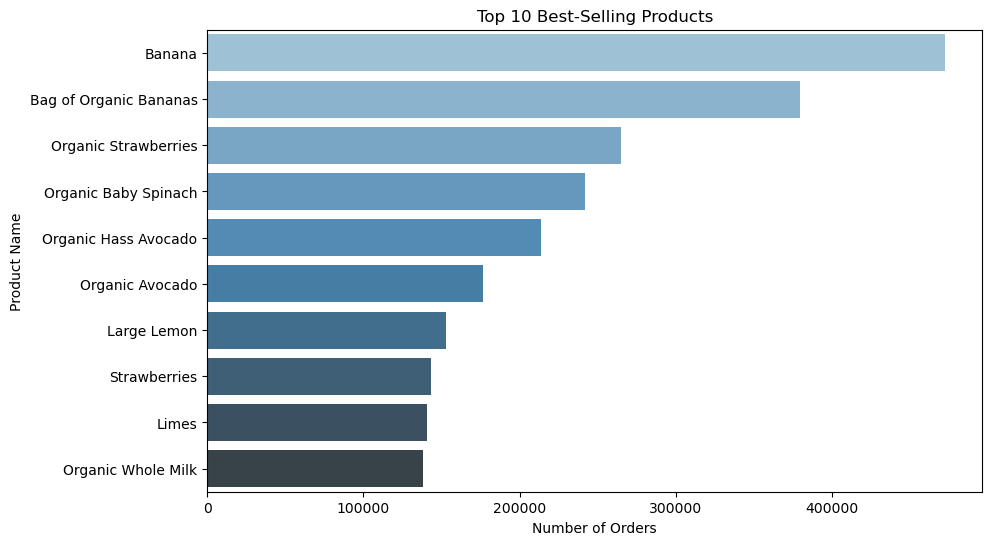

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='order_count', y='product_name', data=total_product_counts.head(10), palette='Blues_d')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()


#3. Business Questions and Analysis 
#a. Popular Products: 
#  - Identify top 5 products commonly added to the cart first. 

In [50]:
first_added_to_cart = order_products[(order_products['add_to_cart_order'] == 1) & (order_products["reordered"] == 1)]
first_added_to_cart.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16
30,5,13176,1,1,Bag of Organic Bananas,24,4
61,8,23423,1,1,Original Hawaiian Sweet Rolls,43,3
77,10,24852,1,1,Banana,24,4


In [51]:
first_in_cart_count = first_added_to_cart[['product_id','product_name']].value_counts().reset_index()
first_in_cart_count.head()

,product_id,product_name,count
0,24852,Banana,97893
1,13176,Bag of Organic Bananas,69041
2,27845,Organic Whole Milk,26740
3,21137,Organic Strawberries,22261
4,47209,Organic Hass Avocado,19698


#3. Business Questions and Analysis 
#a. Popular Products: 
#  - Top 10 product pairs frequently purchased together. 

In [52]:
top_10_pairs = rules.sort_values(by='confidence', ascending=False).head(10)
top_10_pairs

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
37,(Boneless Skinless Chicken Breasts),(Banana),0.018759,0.152958,0.010101,0.538462,3.520319,0.007232,1.835257,0.729622
9,(Organic Fuji Apple),(Banana),0.028860,0.152958,0.014430,0.500000,3.268868,0.010016,1.694084,0.714710
28,(Blueberries),(Banana),0.024531,0.152958,0.011544,0.470588,3.076582,0.007792,1.599968,0.691938
54,(Asparagus),(Organic Baby Spinach),0.021645,0.075036,0.010101,0.466667,6.219231,0.008477,1.734307,0.857775
44,(Organic Gala Apples),(Organic Hass Avocado),0.021645,0.069264,0.010101,0.466667,6.737500,0.008602,1.745130,0.870417
5,(Organic Raspberries),(Bag of Organic Bananas),0.037518,0.122655,0.017316,0.461538,3.762896,0.012714,1.629355,0.762869
61,(Raspberries),(Strawberries),0.024531,0.059163,0.010101,0.411765,6.959828,0.008650,1.599423,0.877853
52,(Organic Cucumber),(Bag of Organic Bananas),0.024531,0.122655,0.010101,0.411765,3.357093,0.007092,1.491486,0.719780
42,(Original Hummus),(Banana),0.025974,0.152958,0.010101,0.388889,2.542453,0.006128,1.386068,0.622857
35,(Cucumber Kirby),(Banana),0.025974,0.152958,0.010101,0.388889,2.542453,0.006128,1.386068,0.622857


#b. Reorder Behavior:
#  - Analyze the reordered column to understand repeat purchase behavior. 

In [53]:
reorder_proportion = order_products['reordered'].value_counts(normalize=True)
reorder_proportion

reordered
1    0.589697
0    0.410303
Name: proportion, dtype: float64

In [54]:
#overall_reorder_rate = order_products['reordered'].mean()
#overall_reorder_rate

#b. Reorder Behavior:
#  - Products reordered the most.  

In [55]:
reordered_products = head_order_products[head_order_products['reordered'] == 1]
reorder_counts = reordered_products[['product_id',"product_name"]].value_counts().reset_index().head(10)
reorder_counts

,product_id,product_name,count
0,24852,Banana,92
1,13176,Bag of Organic Bananas,72
2,47209,Organic Hass Avocado,43
3,21903,Organic Baby Spinach,42
4,21137,Organic Strawberries,39
5,47766,Organic Avocado,31
6,16797,Strawberries,30
7,22935,Organic Yellow Onion,22
8,26209,Limes,22
9,27845,Organic Whole Milk,21


#b. Reorder Behavior:
#   - Reorder behavior based on day of the week and days since prior order.  

In [56]:
reorder_by_dow = orders_prior_merged.groupby('order_dow')['reordered'].mean()
pd.DataFrame(reorder_by_dow.head(100))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6932\2161806880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reorder_by_dow = orders_prior_merged.groupby('order_dow')['reordered'].mean()


,reordered
order_dow,
0,0.585276
1,0.603843
2,0.589771
3,0.586272
4,0.590979
5,0.595470
6,0.574369


d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lenovo\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


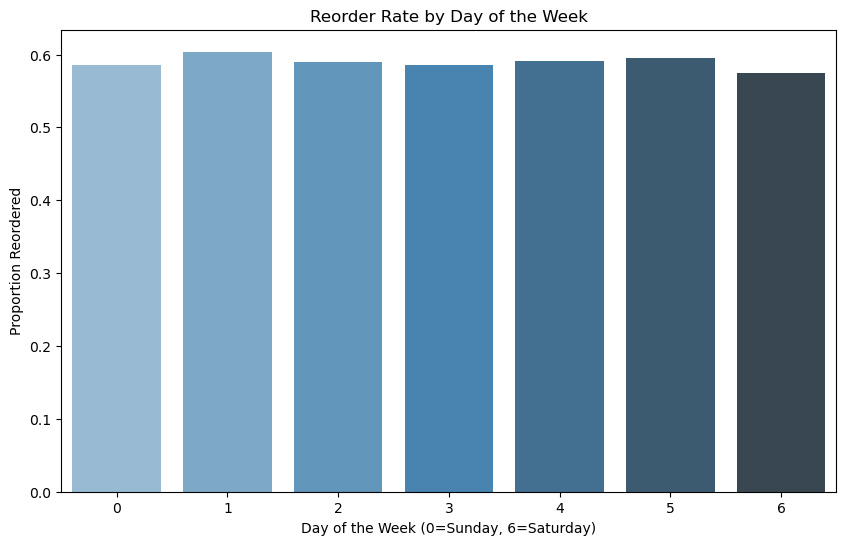

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x=reorder_by_dow.index, y=reorder_by_dow.values, palette='Blues_d')
plt.title('Reorder Rate by Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Proportion Reordered')
plt.show()


In [58]:
reorder_by_days_since_prior = orders_prior_merged.groupby('days_since_prior_order')['reordered'].mean().reset_index()
pd.DataFrame(reorder_by_days_since_prior.head(50))

,days_since_prior_order,reordered
0,0.0,0.738757
1,1.0,0.617624
2,2.0,0.645439
3,3.0,0.668612
4,4.0,0.677562
5,5.0,0.674019
6,6.0,0.677063
7,7.0,0.693683
8,8.0,0.670299
9,9.0,0.651015


d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

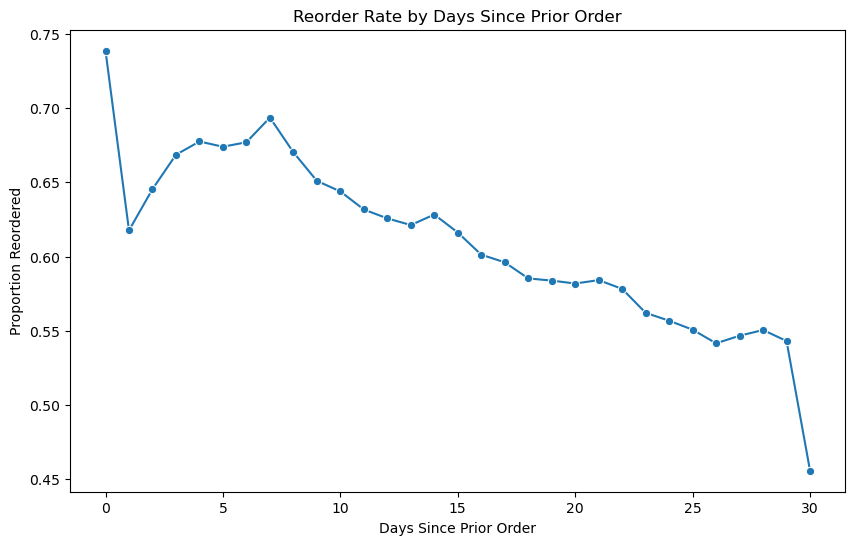

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_since_prior_order', y='reordered', data=reorder_by_days_since_prior, marker='o')
plt.title('Reorder Rate by Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Proportion Reordered')
plt.show()

#b. Reorder Behavior:
# - How the number of items in the cart impacts the likelihood of reordering. 

d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\lenovo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

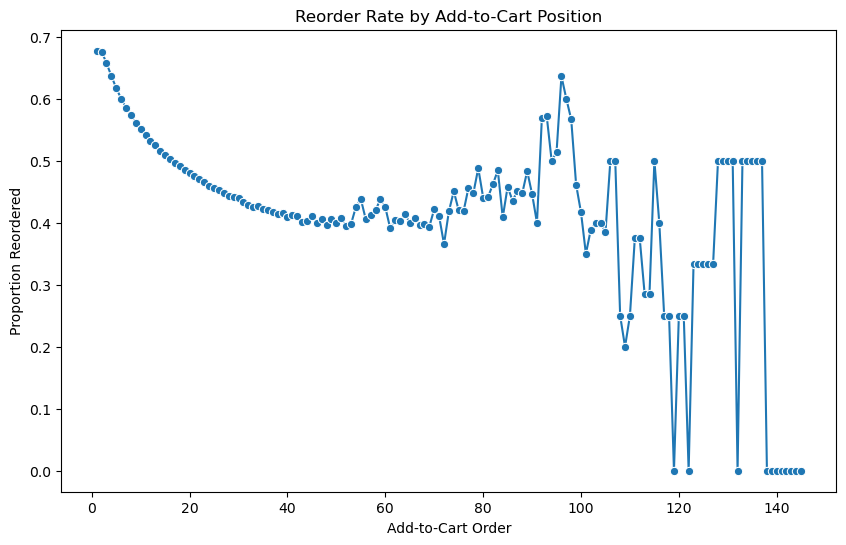

In [60]:
# Calculate the average reorder rate based on the number of items in the cart
reorder_by_cart_order = order_products_prior.groupby('add_to_cart_order')['reordered'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='add_to_cart_order', y='reordered', data=reorder_by_cart_order, marker='o')
plt.title('Reorder Rate by Add-to-Cart Position')
plt.xlabel('Add-to-Cart Order')
plt.ylabel('Proportion Reordered')
plt.show()


#c. Customer Segmentation:
#  - Segment customers based on the total amount they’ve spent on orders. 

In [61]:
customer_spending = orders_prior_merged.groupby('user_id')['product_id'].count().reset_index()
customer_spending.columns = ['user_id', 'total_products_ordered']

customer_spending.head()

,user_id,total_products_ordered
0,1,59
1,2,195
2,3,88
3,4,18
4,5,37


In [62]:
customer_spending['spending_segment'] = pd.qcut(customer_spending['total_products_ordered'], q=3, labels=['Low ', 'Medium ', 'High'])

customer_spending.groupby('spending_segment')['user_id'].count()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6932\4130557766.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_spending.groupby('spending_segment')['user_id'].count()


spending_segment
Low        69600
Medium     68217
High       68392
Name: user_id, dtype: int64

#d. Department and Aisle Analysis: 
# - Best-selling department and aisle breakdown.  

In [63]:
products_merged.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department'],
      dtype='object')

In [64]:
aisle_sales = products_merged.groupby('aisle')['product_id'].count().reset_index()
aisle_sales.head()

,aisle,product_id
0,air fresheners candles,19851
1,asian foods,166607
2,baby accessories,8160
3,baby bath body care,8581
4,baby food formula,382456


In [65]:
department_sales = products_merged.groupby('department')['product_id'].count().reset_index()
department_sales.columns = ['department', 'order_count']
best_selling_departments = department_sales.sort_values(by='order_count', ascending=False)
best_selling_departments

,department,order_count
19,produce,9479291
7,dairy eggs,5414016
20,snacks,2887550
3,beverages,2690129
10,frozen,2236432
16,pantry,1875577
2,bakery,1176787
6,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


In [66]:
aisle_sales = products_merged.groupby('aisle')['product_id'].count().reset_index()
aisle_sales.columns = ['aisle', 'order_count']
best_selling_aisles = aisle_sales.sort_values(by='order_count', ascending=False)
best_selling_aisles


,aisle,order_count
50,fresh fruits,3642188
53,fresh vegetables,3418021
98,packaged vegetables fruits,1765313
133,yogurt,1452343
93,packaged cheese,979763
...,...,...
44,eye ear care,8974
3,baby bath body care,8581
2,baby accessories,8160
8,beauty,6168


#d. Department and Aisle Analysis: 
#  - What is the “produce” department? Break it down by aisle. 

In [67]:

produce_department = products_merged[products_merged['department'] == 'produce']
produce_aisle_sales = produce_department.groupby('aisle')['product_id'].count().reset_index()
produce_aisle_sales.columns = ['aisle', 'order_count']
best_produce_aisles = produce_aisle_sales.sort_values(by='order_count', ascending=False)
best_produce_aisles


,aisle,order_count
0,fresh fruits,3642188
2,fresh vegetables,3418021
4,packaged vegetables fruits,1765313
1,fresh herbs,377741
3,packaged produce,276028


#d. Department and Aisle Analysis: 
# - Differences in purchasing behavior based on different departments or aisles. 

In [68]:
# Calculate the reorder rate for each department
reorder_by_department = products_merged.groupby('department')['reordered'].mean().reset_index()
reorder_by_department.columns = ['department', 'reorder_rate']

# Sort by reorder rate
reorder_by_department = reorder_by_department.sort_values(by='reorder_rate', ascending=False)

reorder_by_department


,department,reorder_rate
7,dairy eggs,0.669969
3,beverages,0.653460
19,produce,0.649913
2,bakery,0.628141
8,deli,0.607719
18,pets,0.601285
1,babies,0.578971
5,bulk,0.577040
20,snacks,0.574180
0,alcohol,0.569924


In [69]:
# Calculate the reorder rate for each aisle
reorder_by_aisle = products_merged.groupby('aisle')['reordered'].mean().reset_index()
reorder_by_aisle.columns = ['aisle', 'reorder_rate']

# Sort by reorder rate
reorder_by_aisle = reorder_by_aisle.sort_values(by='reorder_rate', ascending=False)

reorder_by_aisle


,aisle,reorder_rate
83,milk,0.781428
131,water seltzer sparkling water,0.729593
50,fresh fruits,0.718104
41,eggs,0.705366
119,soy lactosefree,0.692551
...,...,...
8,beauty,0.212062
76,kitchen supplies,0.195377
47,first aid,0.194812
7,baking supplies decor,0.167229


In [1]:
import torch
import torchvision
import torchaudio

print("Torch version:", torch.__version__)
print("TorchVision version:", torchvision.__version__)
print("Torchaudio version:", torchaudio.__version__)


Torch version: 2.6.0+cpu
TorchVision version: 0.21.0+cpu
Torchaudio version: 2.6.0+cpu
